In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("canada_per_capita_income.csv")



In [7]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

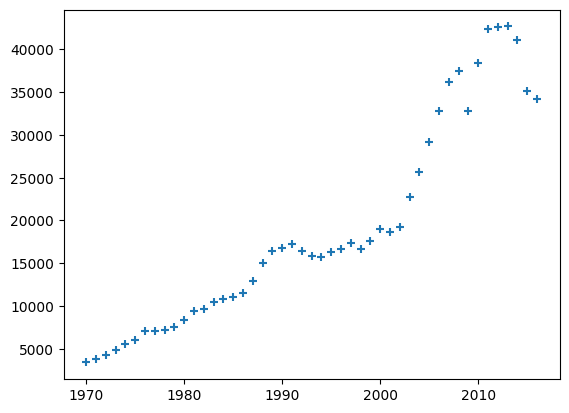

In [11]:
%matplotlib inline
plt.scatter(df['year'],df['per capita income (US$)'],marker="+")
plt.show()

In [13]:
from sklearn import linear_model

In [15]:
model = linear_model.LinearRegression()

In [48]:

model.fit(df[['year']],df['per capita income (US$)']) # first argument requires 2d array


LinearRegression()

In [56]:
res=model.predict([[2020],[2021]]) # argument requires 2d array
res.ndim # 1d array

C:\Users\sraji\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1

In [37]:
model.predict(df[['year']])

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

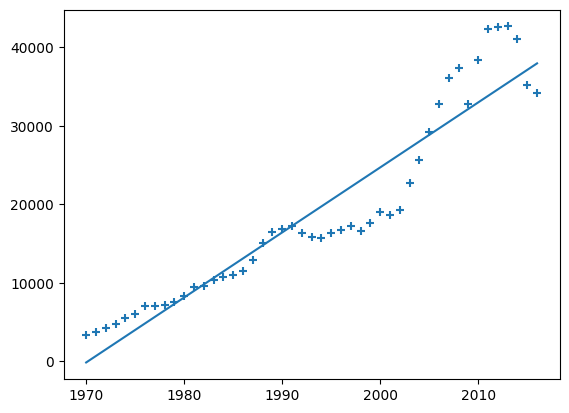

In [46]:
plt.scatter(df['year'],df['per capita income (US$)'],marker="+")
plt.plot(df['year'],model.predict(df[['year']])) #for line plot

# Multivariate Linear Regression 

In [61]:
d = pd.read_csv("hiring.csv")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# Data processing

In [59]:
from word2number import w2n

In [63]:
d['experience']=d['experience'].fillna("zero")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [64]:
d['experience']=d['experience'].apply(w2n.word_to_num)

In [65]:
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [74]:
x=int(d["test_score(out of 10)"].mean())
d["test_score(out of 10)"]=d["test_score(out of 10)"].fillna(x)




In [75]:
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [82]:
reg= linear_model.LinearRegression() # model creation 

In [83]:
reg.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)']) # model training

LinearRegression()

In [81]:
reg.predict([[2,9,6]]) 

C:\Users\sraji\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

# Dummy Variable And One Hot Encoding

## one hot encoder is tough process I am using dummy variable

In [87]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


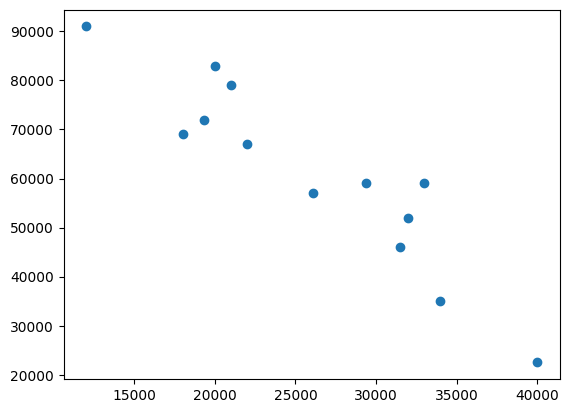

In [89]:
plt.scatter(df['Sell Price($)'],df['Mileage'])

# Using pandas to create dummy variables

In [91]:
dummies= pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [93]:
merged = pd.concat([df,dummies],axis='columns')  # merging original dat frame with dumm
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [95]:
final = merged.drop(['Car Model','Audi A5'],axis='columns')  # droping "Car Model" col since it is not required and drop one dummy variable
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [101]:
X = final.drop(['Sell Price($)'],axis='columns') # droping the targety variable
X
Y=final['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [105]:
X


,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,True,False
1,35000,3,True,False
2,57000,5,True,False
3,22500,2,True,False
4,46000,4,True,False
5,59000,5,False,False
6,52000,5,False,False
7,72000,6,False,False
8,91000,8,False,False
9,67000,6,False,True


In [102]:
model = linear_model.LinearRegression()

In [103]:
model.fit(X,Y)

LinearRegression()

In [104]:
model.score(X,Y)

0.9417050937281082

## Price of mercedez benz that is 4 yr old with mileage 45000

In [110]:
model.predict([[45000,4,False,False]])

C:\Users\sraji\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34537.77647335])

## Price of BMW X5 that is 7 yr old with mileage 86000

In [111]:
model.predict([[86000,7,0,1]])

C:\Users\sraji\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17818.95045785])